# Clustering, k-means
Cluster the data sets train_smpl, **`train_smpl_<label>`** (apply required filters and/or attribute selections if needed), using the k-means algorithm:
* First try to work in a classical clustering scenario and assume that classes are not given. Research methods which allow you to visualise and analyse clusters (and the performance of the clustering algorithm on your data set).
* Note the accuracy of k-means relative to the given clusters.

In [244]:
 from Scripts import helperfn as hf
 from sklearn.cluster import KMeans
 from sklearn.cluster import OPTICS    

 import numpy as np
 import matplotlib.pyplot as plt


In [245]:
X = hf.get_data_noresults()

Y = hf.get_results(-1)
X, Y = hf.balance_by_class(X, Y, size=None, allow_imbalance=False)

#reset index inorder to match cluster indicies for checking what clusters true labels are
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

In [246]:
# 10 clusters due to 10 classes, or 2 because of reuslt datasheet
kmeans = KMeans(n_clusters=10, max_iter=100, n_init=2).fit(X)

In [237]:
from collections import Counter, defaultdict

def ClusterIndicesNumpy(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

cluster = {}

for i in range(len(np.unique(Y))):
    indecies = ClusterIndicesNumpy(i, kmeans.labels_)
    inCluster = Y.to_numpy()[indecies].flatten()

    cluster[i] = Counter(inCluster)
    # print("cluster-", i, "classes:- ", Counter(inCluster))


classes = []

#2d array count of 0 class all clusters
for i in range(len(np.unique(Y))):
    temp = []
    for j in range(len(np.unique(Y))):
        temp.append(cluster[i].get(j,0))
    classes.append(temp)

classes = np.array(classes).T

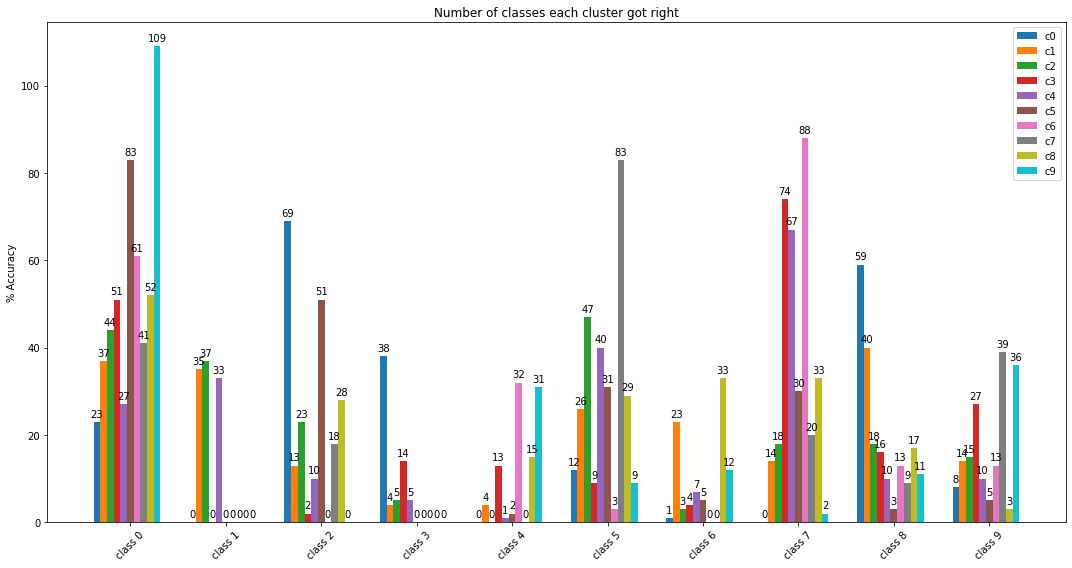

In [238]:
from Scripts import plotScripts as ps

ps.plot_scores(classes, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes each cluster got right", labels=["class 0", "class 1", "class 2", "class 3", "class 4", "class 5", "class 6", "class 7", "class 8", "class 9"], bar_width=0.07, figure_size=(15, 8))

# plt.savefig('foo.png',dpi=400)

In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, kmeans.labels_)

0.2785714285714286

In [318]:
kmeans = KMeans(n_clusters=2, max_iter=100, n_init=2).fit(X)

cluster = {}

for i in range(2):
    indecies = ClusterIndicesNumpy(i, kmeans.labels_)
    inCluster = Y.to_numpy()[indecies].flatten()
    
    cluster[i] = Counter(inCluster)
    print("cluster-", i, "classes:- ", Counter(inCluster))

cluster- 0 classes:-  Counter({7: 180, 5: 163, 6: 163, 4: 149, 3: 147, 9: 141, 2: 120, 8: 117, 1: 91, 0: 47})
cluster- 1 classes:-  Counter({0: 163, 1: 119, 8: 93, 2: 90, 9: 69, 3: 63, 4: 61, 5: 47, 6: 47, 7: 30})


In [319]:
# index 0 - circle, index 1 - rectangle
sign = np.zeros((2, 2))

for i in range(len(cluster)):
    for key, value in cluster[i].items():
        if key < 5:
            sign[i][0] += value 

    sign[i][1] = sum(cluster[0].values()) - sign[i][0]

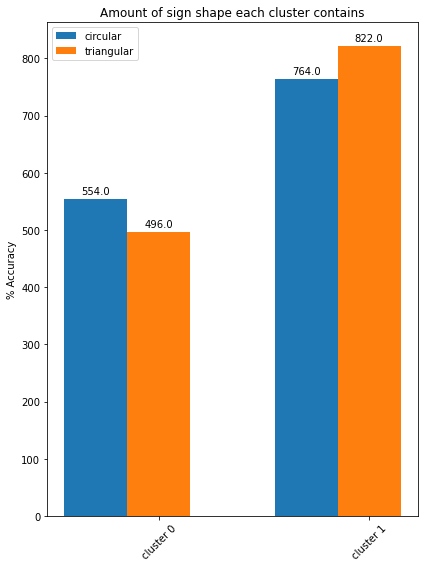

In [322]:
ps.plot_scores(sign, ["circular", "triangular"], title="Amount of sign shape each cluster contains", labels=["cluster 0", "cluster 1"], bar_width=0.3, figure_size=(6, 8))